#### Download Webis-TLDR-17

We download Webis-TLDR-17 from Hugging Face datasets


About

Last updated: 2024-05-11

Created by: Oksana Kalytenko

In [1]:
#pip install datasets
import pandas as pd
from datasets import load_dataset, load_metric

import matplotlib.pyplot as plt
import os
import csv

import warnings
warnings.filterwarnings("ignore")


In [2]:
webis_tldr = load_dataset('reddit', split='train') # the split='train' downloads the whole dataset

Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

In [3]:
webis_tldr_df = webis_tldr.to_pandas()
webis_tldr_df.head()

,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary
0,raysofdarkmatter,I think it should be fixed on either UTC stand...,I think it should be fixed on either UTC stand...,math,t5_2qh0n,c69al3r,I think it should be fixed on either UTC stand...,Shifting seasonal time is no longer worth it.
1,Stork13,Art is about the hardest thing to categorize i...,Art is about the hardest thing to categorize i...,funny,t5_2qh33,c6a9nxd,Art is about the hardest thing to categorize i...,Personal opinions 'n shit.
2,Cloud_dreamer,Ask me what I think about the Wall Street Jour...,Ask me what I think about the Wall Street Jour...,Borderlands,t5_2r8cd,c6acx4l,Ask me what I think about the Wall Street Jour...,insults and slack ass insight. \n Wall Street ...
3,NightlyReaper,"In Mechwarrior Online, I have begun to use a m...","In Mechwarrior Online, I have begun to use a m...",gamingpc,t5_2sq2y,c8onqew,"In Mechwarrior Online, I have begun to use a m...","Yes, Joysticks in modern games have apparently..."
4,NuffZetPand0ra,"You are talking about the Charsi imbue, right?...","You are talking about the Charsi imbue, right?...",Diablo,t5_2qore,c6acxvc,"You are talking about the Charsi imbue, right?...",Class only items dropped from high-lvl monsters.


In [4]:
webis_tldr_subreddits = webis_tldr_df['subreddit'].value_counts()
webis_tldr_subreddits_df = pd.DataFrame({'subreddit':webis_tldr_subreddits.index, 'count':webis_tldr_subreddits.values})
webis_tldr_subreddits_df

,subreddit,count
0,AskReddit,589947
1,relationships,352049
2,leagueoflegends,109307
3,tifu,52219
4,relationship_advice,50416
...,...,...
29646,wherecanibuythis,1
29647,CargoCommander,1
29648,BEARFIGHTASP,1
29649,concertreviews,1


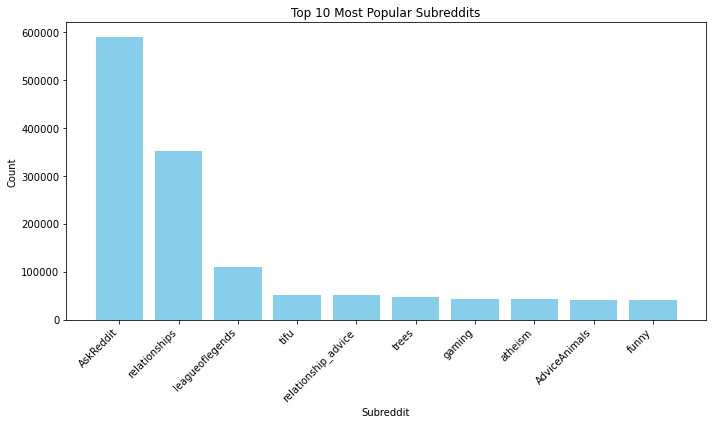

In [5]:
# Select the top 10 most popular subreddits
top_10_subreddits_df = webis_tldr_subreddits_df.nlargest(10, 'count')

# Plotting the top 10 most popular subreddits
plt.figure(figsize=(10, 6))
plt.bar(top_10_subreddits_df['subreddit'], top_10_subreddits_df['count'], color='skyblue')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.title('Top 10 Most Popular Subreddits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [6]:
def filter_by_subreddit(data, subreddit):
    """
    Filter the DataFrame by a chosen subreddit.
    """
    if subreddit in data['subreddit'].unique():
        filtered_data = data[data['subreddit'] == subreddit]
        
    else:
        raise ValueError(f"Subreddit '{subreddit}' does not exist in the DataFrame.")
    
    
    return filtered_data

In [7]:
# you can choose the subreddit to analyse
webis_tldr_subreddit = filter_by_subreddit(webis_tldr_df, 'explainlikeimfive')

In [8]:
webis_tldr_subreddit

,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary
55,Cypriotmenace,Think of it like mailing pages of a book to di...,Think of it like mailing pages of a book to di...,explainlikeimfive,t5_2sokd,c6dydfx,Think of it like mailing pages of a book to di...,"Always look for the highest seeded torrents, a..."
244,senatorskeletor,"""Redistribution"" is short for ""redistribution ...","""Redistribution"" is short for ""redistribution ...",explainlikeimfive,t5_2sokd,c6whsmv,"Redistribution"" is short for ""redistribution o...",1) using the tax system to take money from the...
268,callumgg,"The Chinese system isn't exactly transparent, ...","The Chinese system isn't exactly transparent, ...",explainlikeimfive,t5_2sokd,c6y9grw,"The Chinese system isn't exactly transparent, ...",2700 Delegates and representatives from all ov...
269,mcanerin,Here is an analogy I've used before and might ...,Here is an analogy I've used before and might ...,explainlikeimfive,t5_2sokd,c6yj68l,Here is an analogy I've used before and might ...,"the Communist Party isn't a political party, i..."
481,neo45,"This is a complicated question, but I think it...","This is a complicated question, but I think it...",explainlikeimfive,t5_2sokd,c7fuozw,"This is a complicated question, but I think it...","There's lots of good actors out there, but ver..."
...,...,...,...,...,...,...,...,...
3843709,tedcase,I took no notice of it at first because of jus...,I took no notice of it at first because of jus...,explainlikeimfive,t5_2sokd,t3_38ys1t,I took no notice of it at first because of jus...,"version of the modern Flat Earth theory, and w..."
3844483,JedWasTaken,I realize that our eyesight can be permanently...,I realize that our eyesight can be permanently...,explainlikeimfive,t5_2sokd,t3_2zk4yp,I realize that our eyesight can be permanently...,or elaborate explanation for this topic!
3844517,[deleted],After reading through pages and pages of infor...,After reading through pages and pages of infor...,explainlikeimfive,t5_2sokd,t3_kizn8,After reading through pages and pages of infor...,ers out there.
3845709,OneFatTurkey,*now wait wait wait* \n\nI obviously don't mea...,now wait wait wait \n I obviously don't mean t...,explainlikeimfive,t5_2sokd,t3_31l0jz,now wait wait wait \n I obviously don't mean t...,"of this thread: ""evil cop"" incidences have pro..."


In [20]:
#save your subreddit dataset
# Create a new folder named "data" if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")

# Save data to the "data" folder and use quoting to avoid corrupting the data
webis_tldr_subreddit.to_csv("data/webis_tldr_subreddit_explainlikeimfive.csv", index=False, sep=";", encoding='utf-8', quoting=csv.QUOTE_NONNUMERIC)

In [21]:
# Load the CSV file again into a DataFrame
webis_tldr_subreddit = pd.read_csv("data/webis_tldr_subreddit_explainlikeimfive.csv",  sep = ';')

# Display the DataFrame
webis_tldr_subreddit.head()

,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary
0,Cypriotmenace,Think of it like mailing pages of a book to di...,Think of it like mailing pages of a book to di...,explainlikeimfive,t5_2sokd,c6dydfx,Think of it like mailing pages of a book to di...,"Always look for the highest seeded torrents, a..."
1,senatorskeletor,"""Redistribution"" is short for ""redistribution ...","""Redistribution"" is short for ""redistribution ...",explainlikeimfive,t5_2sokd,c6whsmv,"Redistribution"" is short for ""redistribution o...",1) using the tax system to take money from the...
2,callumgg,"The Chinese system isn't exactly transparent, ...","The Chinese system isn't exactly transparent, ...",explainlikeimfive,t5_2sokd,c6y9grw,"The Chinese system isn't exactly transparent, ...",2700 Delegates and representatives from all ov...
3,mcanerin,Here is an analogy I've used before and might ...,Here is an analogy I've used before and might ...,explainlikeimfive,t5_2sokd,c6yj68l,Here is an analogy I've used before and might ...,"the Communist Party isn't a political party, i..."
4,neo45,"This is a complicated question, but I think it...","This is a complicated question, but I think it...",explainlikeimfive,t5_2sokd,c7fuozw,"This is a complicated question, but I think it...","There's lots of good actors out there, but ver..."
